<a href="https://colab.research.google.com/github/deanjcarey/deanjcarey-UoEO-eportfolio/blob/master/UoEO_Mod_1_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**State of Global Air 2024 report analysis**

Data analysis method using Google Colab Python environment - Dean Carey, April 2025

In [2]:
# Mount my Google drive to Colab environment
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Test the dataset
import pandas as pd

file_path = 'gdrive/My Drive/DALY by Air pollutant type cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows to check dataset
print(df.head())

   Burden Id                Region  Year  Cause Name Age Group Name  \
0     566689  Andean Latin America  1990  All causes       All ages   
1     566692  Andean Latin America  1991  All causes       All ages   
2     566695  Andean Latin America  1992  All causes       All ages   
3     566698  Andean Latin America  1993  All causes       All ages   
4     566701  Andean Latin America  1994  All causes       All ages   

   Burden Mean  Burden Upper  Burden Lower Pollutant  
0     877900.0     1489000.0      372400.0      pm25  
1     865600.0     1430000.0      427300.0      pm25  
2     869500.0     1384000.0      472500.0      pm25  
3     855500.0     1321000.0      479500.0      pm25  
4     839200.0     1272000.0      464800.0      pm25  


   Burden Id                Region  Year  Cause Name Age Group Name  \
0     566689  Andean Latin America  1990  All causes       All ages   
1     566692  Andean Latin America  1991  All causes       All ages   
2     566695  Andean Latin America  1992  All causes       All ages   
3     566698  Andean Latin America  1993  All causes       All ages   
4     566701  Andean Latin America  1994  All causes       All ages   

   Burden Mean  Burden Upper  Burden Lower Pollutant  
0     877900.0     1489000.0      372400.0      pm25  
1     865600.0     1430000.0      427300.0      pm25  
2     869500.0     1384000.0      472500.0      pm25  
3     855500.0     1321000.0      479500.0      pm25  
4     839200.0     1272000.0      464800.0      pm25  
Region  Andean Latin America  Australasia  Caribbean  Central Africa  \
Year                                                                   
1990                  0.8100     0.001510     0.8897           4.743   
1991                  0.767

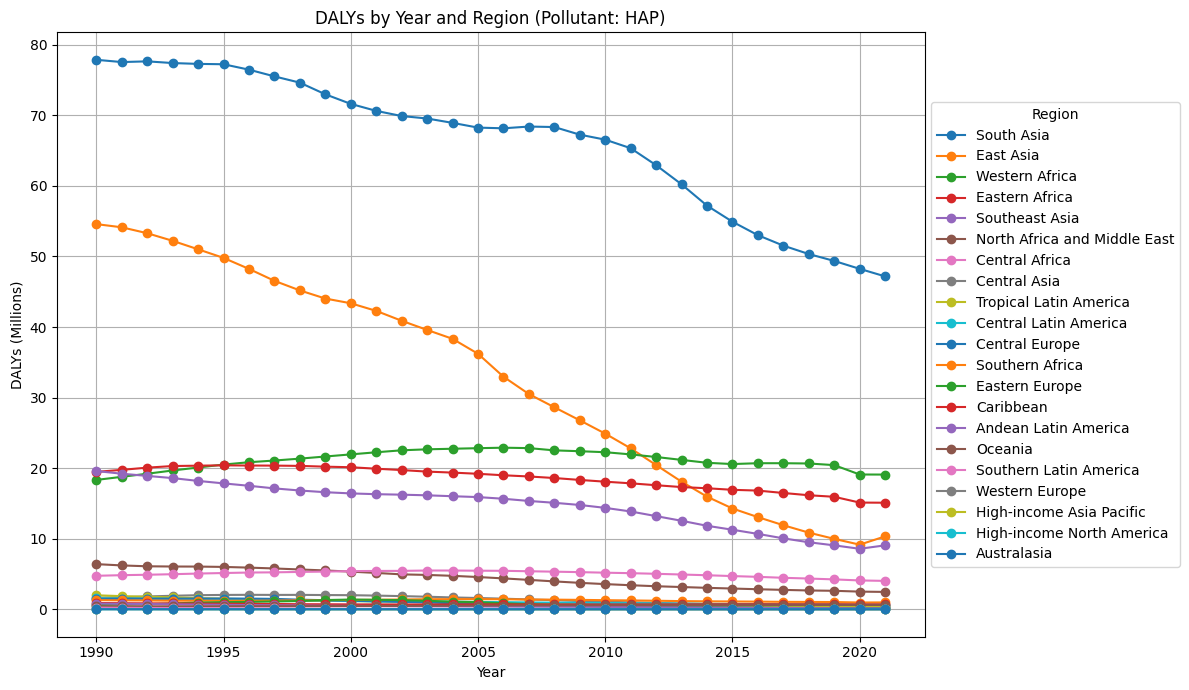

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the csv file from my Google drive
file_path = 'gdrive/My Drive/DALY by Air pollutant type cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows to check raw dataset
print(df.head())

# Filter the DataFrame for a given pollutant type
df_filtered = df[df['Pollutant'] == 'hap']

# Create a pivot table
pivot_df = df_filtered.pivot(index='Year', columns='Region', values='Burden Mean')

# Convert Burden Mean values into millions
pivot_df = pivot_df / 1e6

# Print the first 5 rows of the pivot table
print(pivot_df.head(5))

# Create a region order based on the maximum Burden value - default (alpha) order made it difficult to match the legend key to the chart data
region_order = pivot_df.max().sort_values(ascending=False).index.tolist()

# Plotting the line chart for each region by year in the sorted order
plt.figure(figsize=(12, 7))
for region in region_order:
    plt.plot(pivot_df.index, pivot_df[region], marker='o', label=region)

plt.title("DALYs by Year and Region (Pollutant: HAP)")
plt.xlabel("Year")
plt.ylabel("DALYs (Millions)")
#plt.legend(title="Region") - default puts legend in middle of chart
plt.legend(title="Region", loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()

# Save the plot as an image
plt.savefig("DALYs_by_year_pm25.png")

plt.show()

   Burden Id                Region  Year  Cause Name Age Group Name  \
0     566689  Andean Latin America  1990  All causes       All ages   
1     566692  Andean Latin America  1991  All causes       All ages   
2     566695  Andean Latin America  1992  All causes       All ages   
3     566698  Andean Latin America  1993  All causes       All ages   
4     566701  Andean Latin America  1994  All causes       All ages   

   Burden Mean  Burden Upper  Burden Lower Pollutant  
0     877900.0     1489000.0      372400.0      pm25  
1     865600.0     1430000.0      427300.0      pm25  
2     869500.0     1384000.0      472500.0      pm25  
3     855500.0     1321000.0      479500.0      pm25  
4     839200.0     1272000.0      464800.0      pm25  
Year                             2021
Region                               
North Africa and Middle East  6800.00
East Asia                     5320.00
High-income North America     5280.00
South Asia                    4280.00
Southeast Asia 

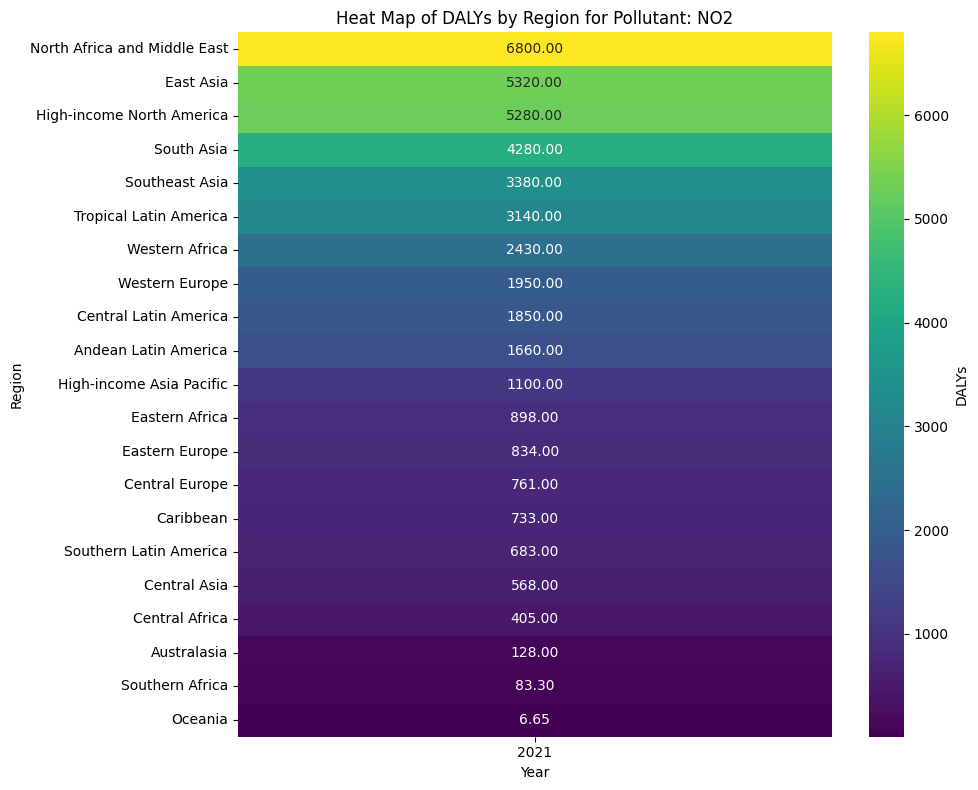

In [15]:
# Experiment using heat maps

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the csv file from my Google drive
file_path = 'gdrive/My Drive/DALY by Air pollutant type cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

# Filter the DataFrame for the pollutant no2
df_no2 = df[(df['Pollutant'].str.lower() == 'no2') & (df['Year'] == 2021)]

# Create a pivot table
pivot_df = df_no2.pivot(index='Region', columns='Year', values='Burden Mean')

# Order the pivot table
pivot_df = pivot_df.sort_values(by=2021, ascending=False)

# Print the pivot table to verify data - should only have the year 2021 as a column
print(pivot_df)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap='viridis', cbar_kws={'label': 'DALYs'})
plt.title("Heat Map of DALYs by Region for Pollutant: NO2")
plt.ylabel("Region")
plt.xlabel("Year")
plt.tight_layout()

plt.show()